# 第3回資料
- データ加工
- 相関係数
- クロス表（ピボットテーブル）

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## データ/ボストンの住宅価格データ
- scikit-learnに含まれているボストンの住宅価格データを利用。

In [42]:
from sklearn.datasets import load_boston
boston = load_boston()

### ボストン住宅価格データの構造
- 辞書型
```
{'data': array,
 'target': array,
 'feature_names': array,
 'DESCR': string
}
```
- データのカラム

|カラム名|型|内容|
|:-:|:-:|:-:|
|CRIM|実数| 人口1人あたりの犯罪発生率|
|ZN|実数| 25,000平方フィート以上の住居区画の占める割合|
|INDUS|実数|小売業以外の商業が占める面積の割合|
|CHAS|実数|チャールズ川によるダミー変数（1:川の周辺、0:それ以外）|
|NOX|実数|NOXの濃度|
|RM|実数|住居の平均部屋数|
|AGE|実数|1940年より前に建てられた物件の割合|
|DIS|実数|5つのボストン市の雇用施設からの距離（重み付け済）|
|RAD|実数|環状高速道路へのアクセスしやすさ|
|TAX|実数|$10,000ドルあたりの不動産税率の総計|
|PTRATIO|実数|町毎の児童と教師の比率|
|B|実数|町毎の黒人（Bk）の比率|
|LSTAT|実数|給与の低い職業に従事する人口の割合（%）|


### データの説明の表示

In [35]:
print(load_boston().DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

## データの加工

### データフレームに変換
- まずは取り扱いやすくするために、pandasのデータフレームに変換する。
- pd.DataFrame(データ, columns=カラム名のリスト)

In [43]:
boston = pd.DataFrame(boston.data, columns=boston.feature_names)

- 表示してみる。
- bostonを入れると大量のデータが表示されるので、boston.head()として、最初の5行だけを表示させる。

In [44]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


### データの全体像の把握
- データの構造を見るにはまず基本統計量を見る。
- 基本統計量はboston.describe()で計算可能。

In [45]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


- 表示桁数を小数点以下2桁に修正

In [49]:
pd.options.display.precision = 2

In [50]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,5.06e+02,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.59e+00,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65
std,8.60e+00,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14
min,6.32e-03,0.00,0.46,0.00,0.39,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73
25%,8.20e-02,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95
50%,2.57e-01,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36
75%,3.65e+00,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.23,16.96
max,8.90e+01,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97


## 相関・散布図

### 散布図行列
- seabornのpairplot関数を使う。

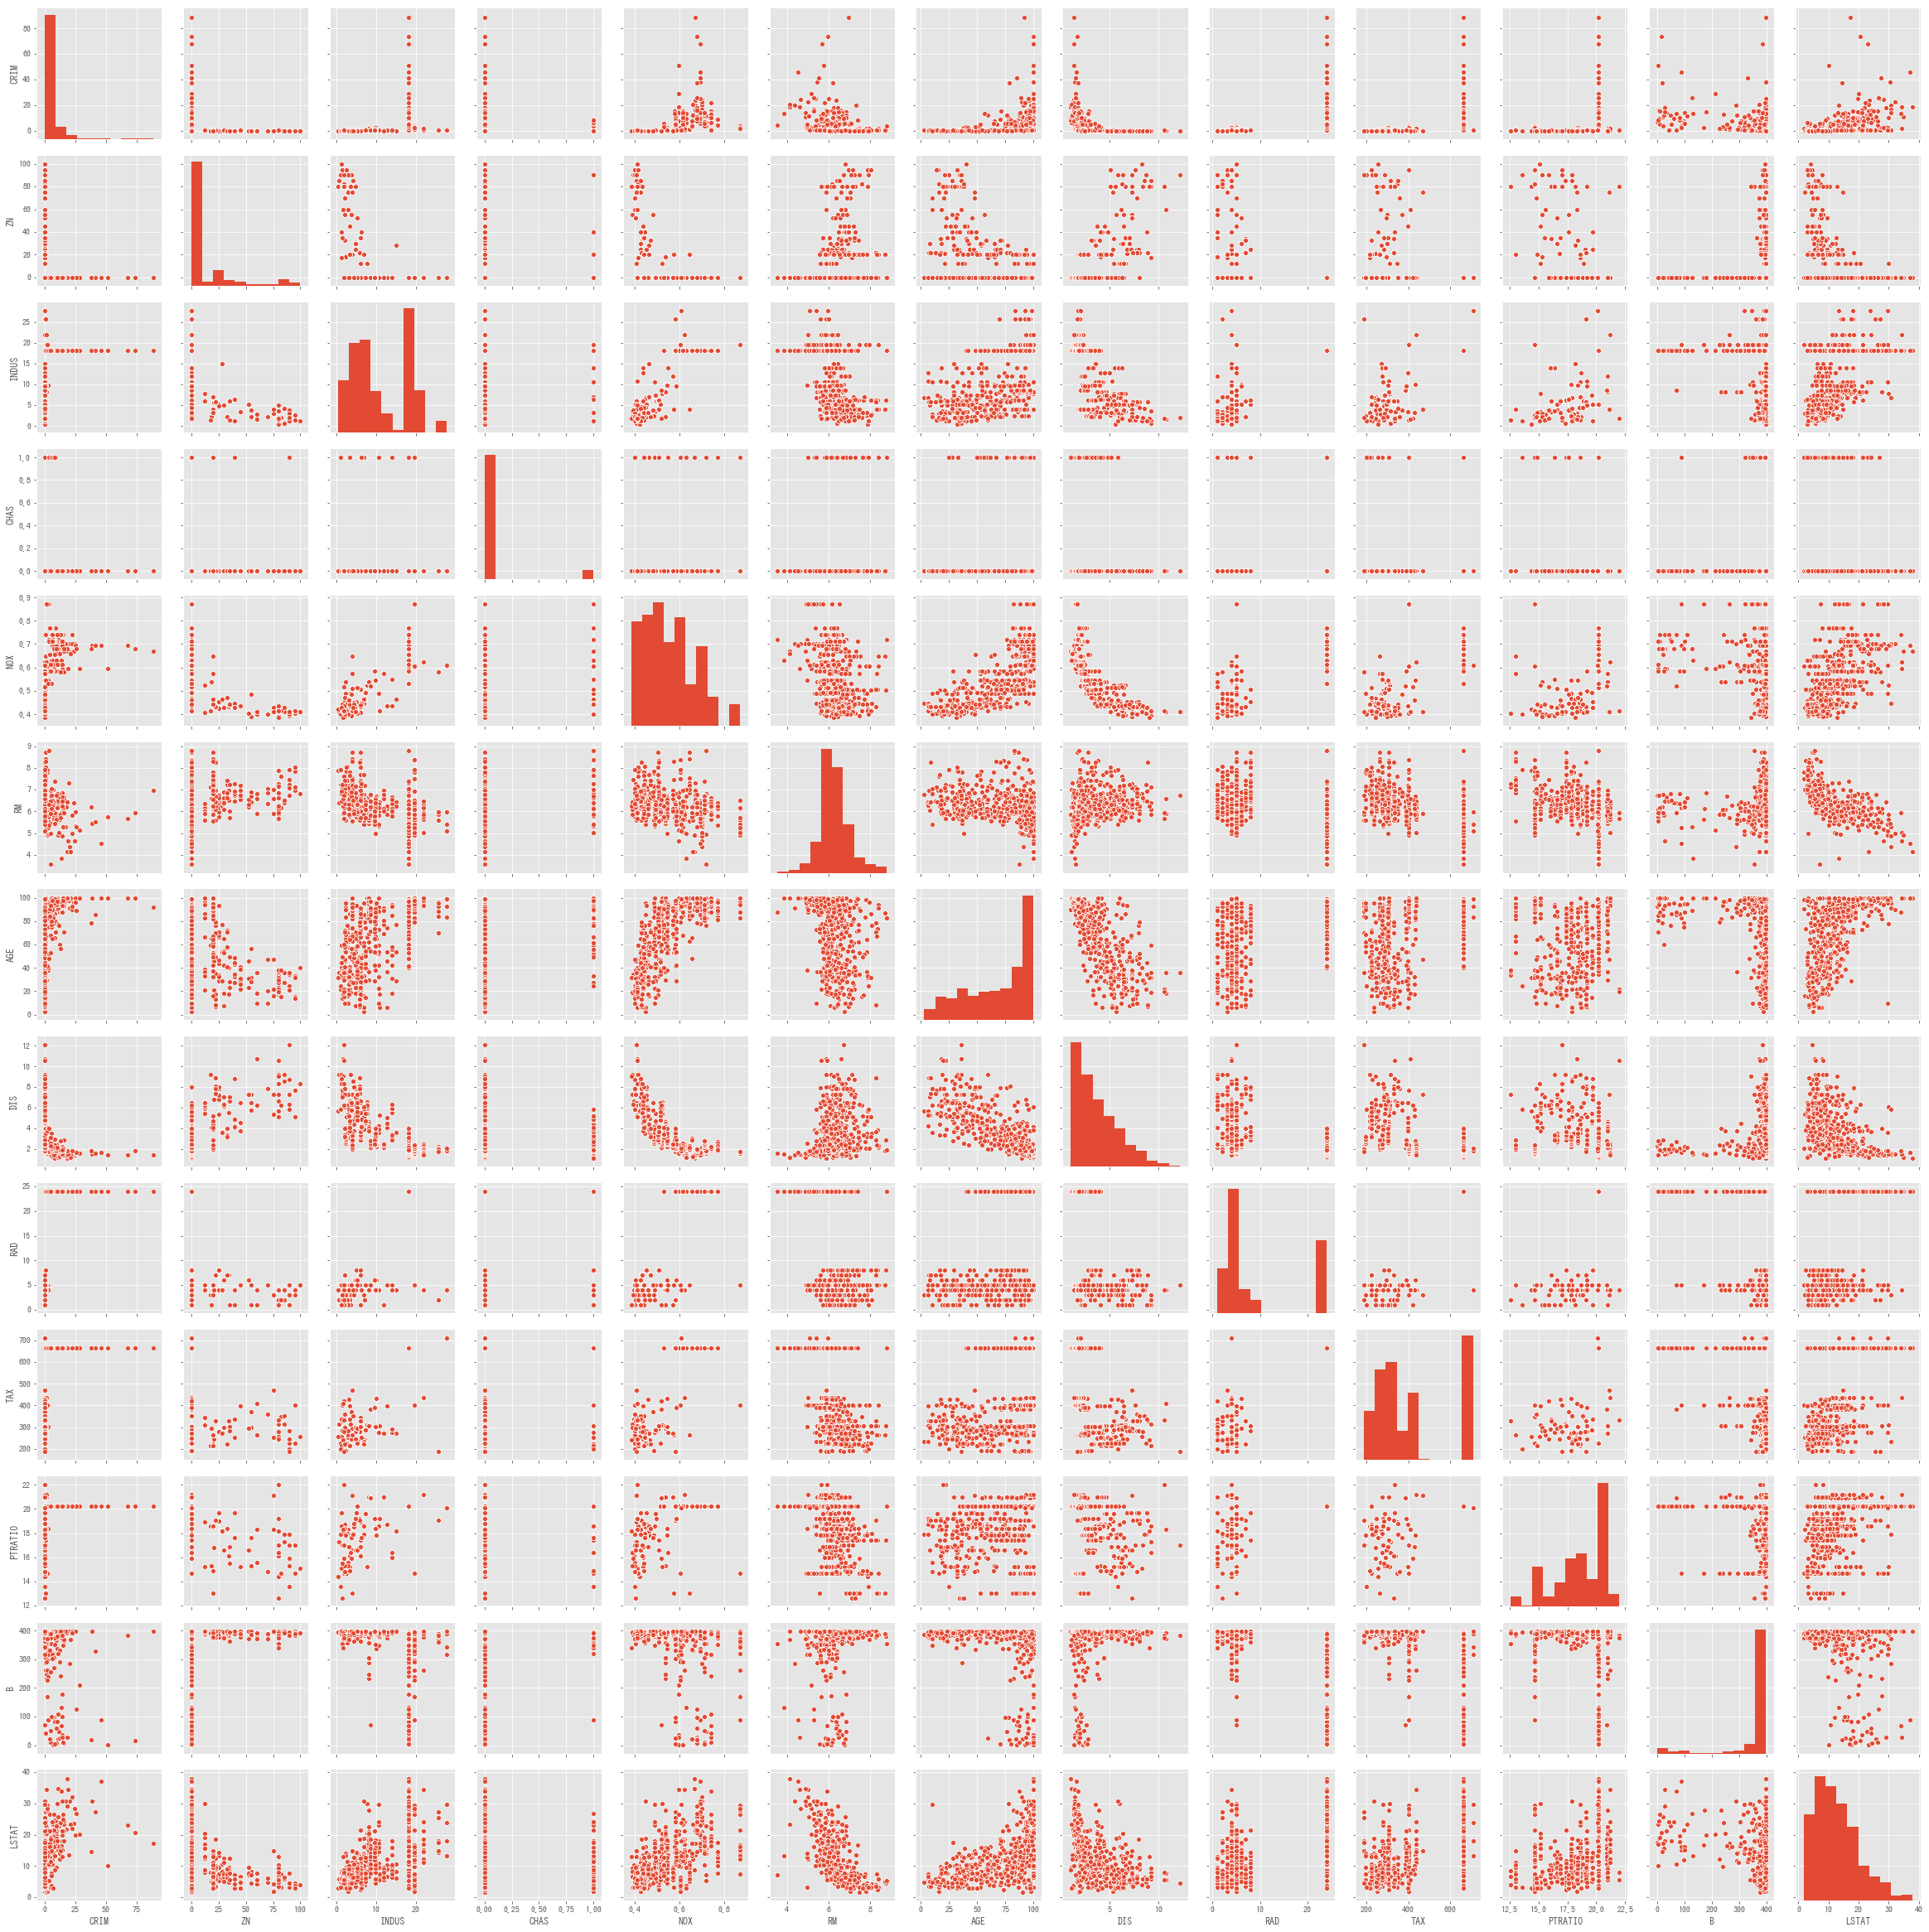

In [52]:
sns.pairplot(boston)

- 数が多い場合はカラムを絞って表示させることができる。

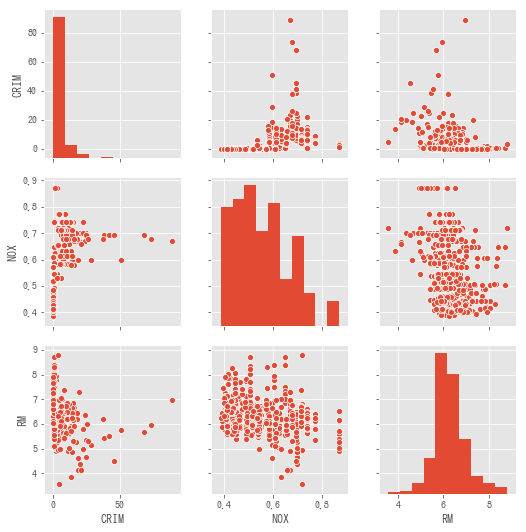

In [54]:
sns.pairplot(boston[['CRIM', 'NOX', 'RM']])

### 相関行列

In [58]:
boston.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.00,-0.20,0.40,-5.53e-02,0.42,-0.22,0.35,-0.38,6.22e-01,0.58,0.29,-0.38,0.45
ZN,-0.20,1.00,-0.53,-4.27e-02,-0.52,0.31,-0.57,0.66,-3.12e-01,-0.31,-0.39,0.18,-0.41
INDUS,0.40,-0.53,1.00,6.29e-02,0.76,-0.39,0.64,-0.71,5.95e-01,0.72,0.38,-0.36,0.60
CHAS,-0.06,-0.04,0.06,1.00e+00,0.09,0.09,0.09,-0.10,-7.37e-03,-0.04,-0.12,0.05,-0.05
NOX,0.42,-0.52,0.76,9.12e-02,1.00,-0.30,0.73,-0.77,6.11e-01,0.67,0.19,-0.38,0.59
RM,-0.22,0.31,-0.39,9.13e-02,-0.30,1.00,-0.24,0.21,-2.10e-01,-0.29,-0.36,0.13,-0.61
AGE,0.35,-0.57,0.64,8.65e-02,0.73,-0.24,1.00,-0.75,4.56e-01,0.51,0.26,-0.27,0.60
DIS,-0.38,0.66,-0.71,-9.92e-02,-0.77,0.21,-0.75,1.00,-4.95e-01,-0.53,-0.23,0.29,-0.50
RAD,0.62,-0.31,0.60,-7.37e-03,0.61,-0.21,0.46,-0.49,1.00e+00,0.91,0.46,-0.44,0.49
TAX,0.58,-0.31,0.72,-3.56e-02,0.67,-0.29,0.51,-0.53,9.10e-01,1.00,0.46,-0.44,0.54


### ヒートマップ

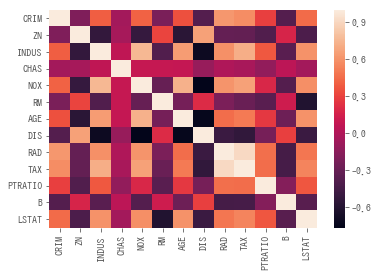

In [59]:
sns.heatmap(boston.corr())

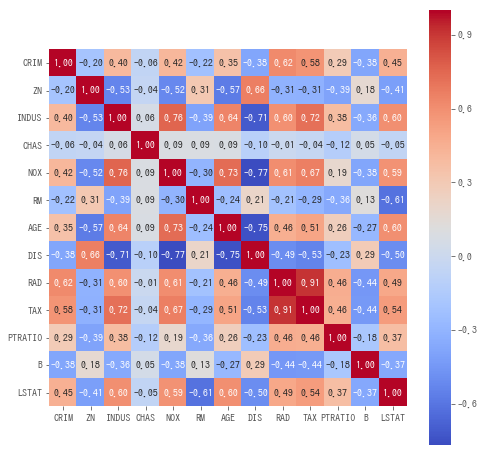

In [70]:
plt.figure(figsize=(8,8))
sns.heatmap(boston.corr(), 
            cbar=True,
            annot=True,
            square=True,
            fmt='.2f',
            annot_kws={'size': 10},
            yticklabels=boston.columns,
            xticklabels=boston.columns,
            cmap="coolwarm")



## クロス表
- pandas.crosstab関数を使う

In [71]:
pd.crosstab(boston['CHAS'], boston['RAD'])

RAD,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,24.0
CHAS,,,,,,,,,
0.0,19,24,36,102,104,26,17,19,124
1.0,1,0,2,8,11,0,0,5,8


- margins=Trueを指定すると、行・列の合計を表示することができる。

In [72]:
pd.crosstab(boston['CHAS'], boston['RAD'], margins=True)

RAD,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,24.0,All
CHAS,,,,,,,,,,
0.0,19,24,36,102,104,26,17,19,124,471
1.0,1,0,2,8,11,0,0,5,8,35
All,20,24,38,110,115,26,17,24,132,506


- 行方向の比率計算

In [75]:
pd.crosstab(boston['CHAS'], boston['RAD'], margins=True, normalize='index')

RAD,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,24.0
CHAS,,,,,,,,,
0.0,0.04,0.05,0.08,0.22,0.22,0.06,0.04,0.04,0.26
1.0,0.03,0.00,0.06,0.23,0.31,0.00,0.00,0.14,0.23
All,0.04,0.05,0.08,0.22,0.23,0.05,0.03,0.05,0.26


- 列方向の比率計算

In [76]:
pd.crosstab(boston['CHAS'], boston['RAD'], margins=True, normalize='columns')

RAD,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,24.0,All
CHAS,,,,,,,,,,
0.0,0.95,1.0,0.95,0.93,0.9,1.0,1.0,0.79,0.94,0.93
1.0,0.05,0.0,0.05,0.07,0.1,0.0,0.0,0.21,0.06,0.07
